## Student number: 112050

### Exercise 1

#### Sharpening 
In order to start sharpening the image soccerteam.jpg we first need to read the image in python so that we may operate on it. There are many different libraries in order to this but we will use the skimage library. The image is read as a 3d array where each element reprensents a pixel value that ranges from 0 to 255.

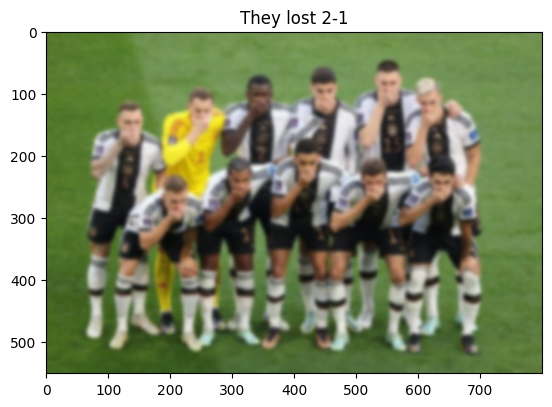

In [61]:
%matplotlib inline
from skimage import io # Used for reading
import matplotlib.pyplot as plt # Used for plotting

soccer_image = io.imread("soccerteam.jpg") # Reads the image
plt.title("They lost 2-1")
plt.imshow(soccer_image) # Shows the image

There are many different sharpening techniques we could apply in order to make it more presentable. 

Method 1 Unsharp mask:

This is a linear image processing technique that sharpens the image. The enhanced image is the difference between the original image and its blurred version multiplied by and amount and added back to the original image. It can be summarized in the following formula:

$$
I_E = I + \alpha (I-I_B)
$$

Where $I_E$ is the new enhanced image, $I$ is the original image, $\alpha$ is the scale amount and $I_B$ is the blurred version. Blurring can be done using many different filters such as e.g. median filter, but  Gaussian is the most common.

Below I have made a simple function in python where the above equation is implemented.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


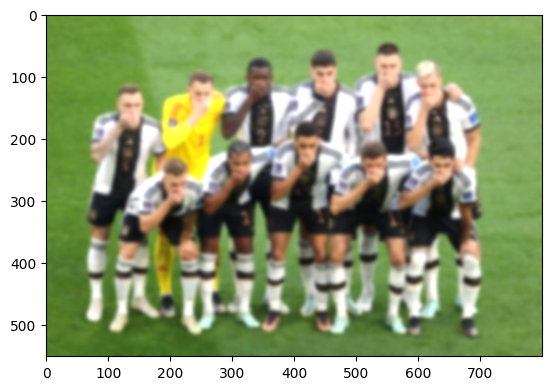

In [62]:
from skimage.filters import gaussian 
import numpy as np

def unsharp_masking(image, amount, sig):
    blur_image = gaussian(image, sigma=sig, channel_axis=True)
    enhanced_image = image + amount*(image-blur_image)
    return enhanced_image.astype(int)


amount = 0.2
sig = 5

um = unsharp_masking(soccer_image, amount, sig)
plt.imshow(um, vmin=0, vmax=1)

The function did not seem to give that good results other than the fact that it increased some of the lighting in the image. Many other amount and sigma values where used but this is the best one.

Luckily skimage has its own unsharp_mask method which is far better. Below is code used. 

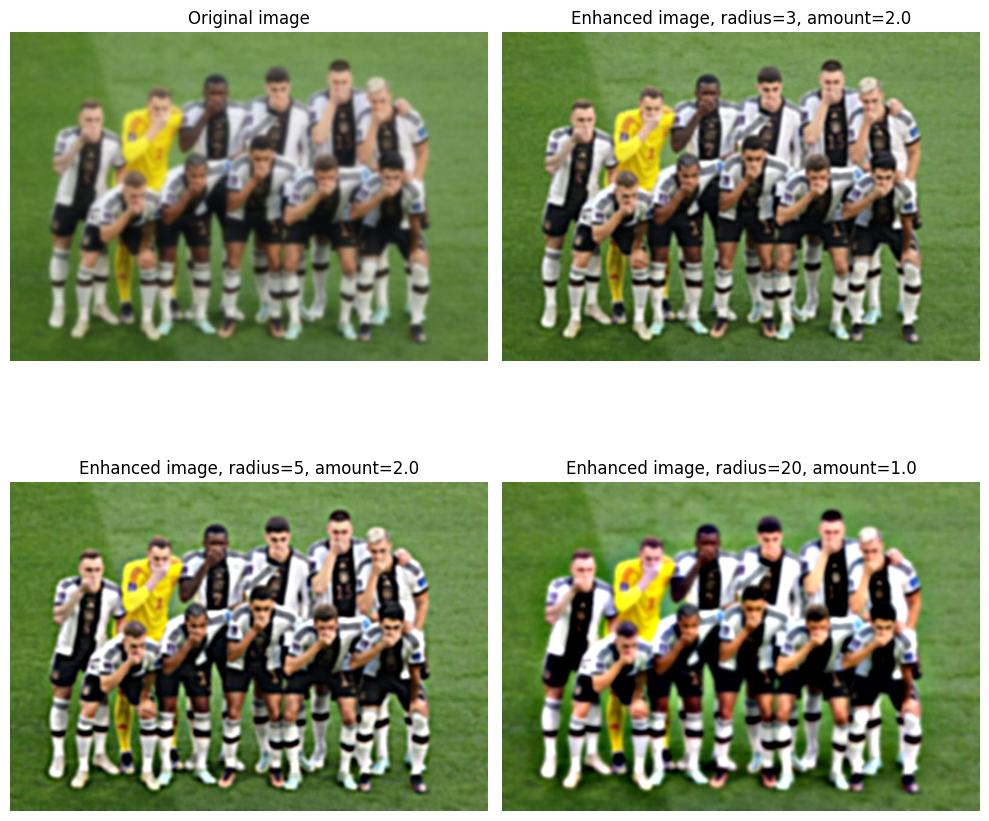

In [63]:
from skimage.filters import unsharp_mask

result_1 = unsharp_mask(soccer_image, radius=3, amount=2)
result_2 = unsharp_mask(soccer_image, radius=5, amount=2)
result_3 = unsharp_mask(soccer_image, radius=20, amount=1)

fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(soccer_image)
ax[0].set_title('Original image')
ax[1].imshow(result_1)
ax[1].set_title('Enhanced image, radius=3, amount=2.0')
ax[2].imshow(result_2)
ax[2].set_title('Enhanced image, radius=5, amount=2.0')
ax[3].imshow(result_3)
ax[3].set_title('Enhanced image, radius=20, amount=1.0')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

As can be seen the image is a lot less blurry using the unsharp_mask from skimage instead. It seems like the best two images are the ones where the:

$$
radius = 3, amount = 2
$$
$$
radius = 5, amount = 2
$$

The one with $radius = 20$ and $amount = 1$ is a little to bright and exposes to much of its blurriness in my opinion and does not look that presentable.

#### Canny filter

Canny filter is a multi staged edge detector belonging to the category of gradientfilters as it is based on the derivative of a Gaussian filtered image to compute the intensity of the gradients. In this filter operation the Gaussian reduces the effect of noise in the image and potential edges are thinned down 1-pixel by removing the non-maximum pixels of the gradient magnitude. 

#### Blurred

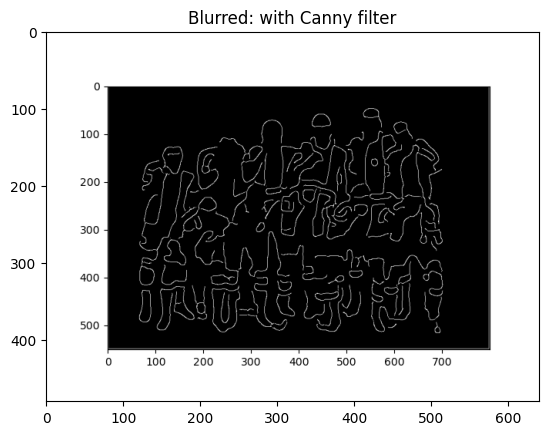

In [70]:
# I displayed the image in python because there were some issues with pasting it into this pdf document
blurry_canny = io.imread('edges3.png')
plt.title("Blurred: with Canny filter")
plt.imshow(blurry_canny)

Based on the fact that there are not that many strong edges in this picture, I would say that this is the blurred image because in blurred images the contours are not that visible. And hence when the canny filter was applied this was result.

#### Sharpened

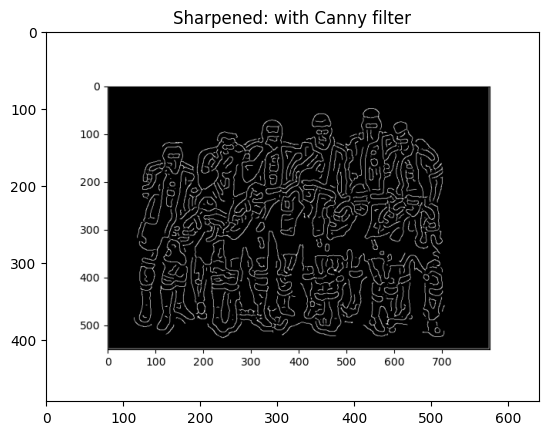

In [69]:
# I displayed the image in python because there were some issues with pasting it into this pdf document
blurry_sharpy = io.imread('edges4.png')
plt.title("Sharpened: with Canny filter")
plt.imshow(blurry_sharpy)

This is the sharpened image with a canny filter applied. Here the lines are more well defined and the edges are more visible. This has to be the sharpened version.

To apply the canny filter we may use the canny edge detector from skimage. But first we need to convert the image from RGB to gray scale and then apply the canny edge detector. The code below applies the canny filter on the blurred image.

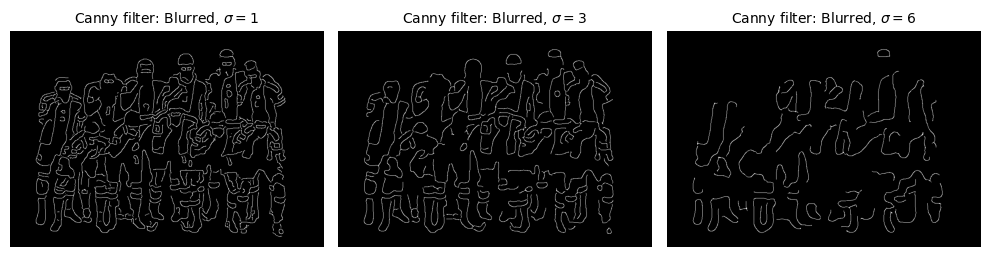

In [57]:
from skimage import feature
from skimage.color import rgb2gray

# Converting the blurred and the our sharpened image to grayscale
gray_scale_blurred = rgb2gray(soccer_image)

# Applying canny filter with 3 different sigma values on blurred image
canny_image_blurr1 = feature.canny(gray_scale_blurred, 1)
canny_image_blurr3 = feature.canny(gray_scale_blurred, 3)
canny_image_blurr6 = feature.canny(gray_scale_blurred, 6)

fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(10, 10))
ax[0].imshow(canny_image_blurr1, cmap='gray')
ax[0].set_title(r'Canny filter: Blurred, $\sigma=1$', fontsize=10)

ax[1].imshow(canny_image_blurr3, cmap='gray')
ax[1].set_title(r'Canny filter: Blurred, $\sigma=3$', fontsize=10)

ax[2].imshow(canny_image_blurr6, cmap='gray')
ax[2].set_title(r'Canny filter: Blurred, $\sigma=6$', fontsize=10)

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

Here we see that when $\sigma = 3$ for the canny filter applied on our sharpened image we get the same image at the top in figure 2 of the task. This further proves that it must be the blurred image.

Now on the we may do the same for the sharpened image.

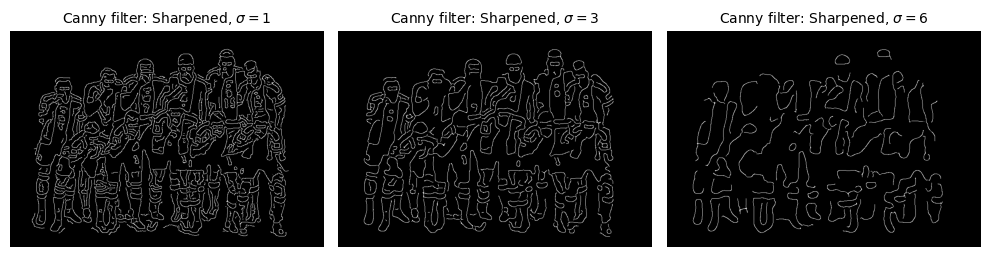

In [55]:
# The one from previous exercise assigned to another variable for convinience
sharpened_image = result_1

# Converting the blurred and the our sharpened image to grayscale
gray_scale_sharp = rgb2gray(sharpened_image)

#  Applying canny filter with 3 different sigma values on sharpened image
canny_image_sharp1 = feature.canny(gray_scale_sharp, 1)
canny_image_sharp3 = feature.canny(gray_scale_sharp, 3)
canny_image_sharp6 = feature.canny(gray_scale_sharp, 6)

fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(10, 10))
ax[0].imshow(canny_image_sharp1, cmap='gray')
ax[0].set_title(r'Canny filter: Sharpened, $\sigma=1$', fontsize=10)

ax[1].imshow(canny_image_sharp3, cmap='gray')
ax[1].set_title(r'Canny filter: Sharpened, $\sigma=3$', fontsize=10)

ax[2].imshow(canny_image_sharp6, cmap='gray')
ax[2].set_title(r'Canny filter: Sharpened, $\sigma=6$', fontsize=10)

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

Here we see that when $\sigma = 1$ for the canny filter applied on our sharpened image gives us the same image at the bottom shown in figure 2 of the task. This further proves that it must be the sharpened image.

#### Key observations from application from using the canny filter 

The key observations that are most obvious is the fact that the edges gets less defined as the sigma value increases. Hence it could be really hard to tell if the canny filter was applied on a blurry image or an sharpened image. Because larger sigma values could make it look like it was applied on a blurry image.

### Exercise 2